## This notebook is wave propagating constant velocity and enthalpy inflow

In [1]:
using Plots
pyplot()

Plots.PyPlotBackend()

In [2]:
cd(dirname(pwd()))
cd("src")
include("Tools.jl")
include("FiniteDifference.jl")
include("TimeMarching.jl")
include("Initial.jl")
include("Systems.jl")
include("BoundaryCondition.jl")

using ..Tools
using ..FiniteDifference
using ..TimeMarching
using ..Initial
using ..Systems
using ..BoundaryCondition
pwd()

"C:\\Users\\liyux\\github\\thermo-network\\src"

## Parameters for the RHS

In [3]:
P=1;
Ac=1; # unreal
qw=0;

righthand=[0;0;P/Ac*qw]

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

## Initialization (wave)

In [4]:
    # Initial spacial variables
    nx = 201   
    gamma = 1.4
    xlim = (0.0,1.0)
    Δx = (xlim[2]-xlim[1])/nx
    ux,uu=Initial.initial_one_wave(nx,xlim,gamma)
#     ux,uu=Initial.initial_sod(nx,xlim,gamma)

    # get every property from the initial uu
    uueverythinginitial=Systems.UUtoEverything(uu,gamma)
    
    # Initial time and storage arrays
    t = 0.0
    thist = []
    uhist = []

#  plot(ux,uueverythinginitial.u,xlabel="z",label="Numerical")

0-element Array{Any,1}

## Time Marching (with boundary condition)


In [5]:
    Δt = 0.0001

    println("Δx=",Δx);
    println("Δt=",Δt);



    #Calculation time
    tf = 1
    tsample = tf/100;
    T = Δt:Δt:tf

    # Push it with time!
    for ti in T
        
        t, uu = TimeMarching.stegerwarmingrk1!(t,uu,righthand,ShockTubeSystem(gamma,Δt,Δx))

        uu[:,end]=set_outlet_nonreflect_boundary!(uu,uueverythinginitial,Δx,Δt)
#         uu[:,end]=set_outlet_costant_p_boundary!(uu,uueverythinginitial,Δx,Δt)
        uu[:,1]=set_inlet_constant_h!(uu,uueverythinginitial,Δx,Δt)
    
        # get every property from uu in every time step
        uueverything=Systems.UUtoEverything(uu,gamma)
    
    
        (isapprox(mod(t,tsample),0,atol=1e-12) || isapprox(mod(t,tsample),tsample,atol=1e-12)) ? push!(thist,deepcopy(t)) : nothing
        (isapprox(mod(t,tsample),0,atol=1e-12) || isapprox(mod(t,tsample),tsample,atol=1e-12)) ? push!(uhist,deepcopy(uueverything)) : nothing
    end

    

Δx=0.004975124378109453
Δt=0.0001


In [6]:
maximum(uhist[1].p)

1.0093655005264806

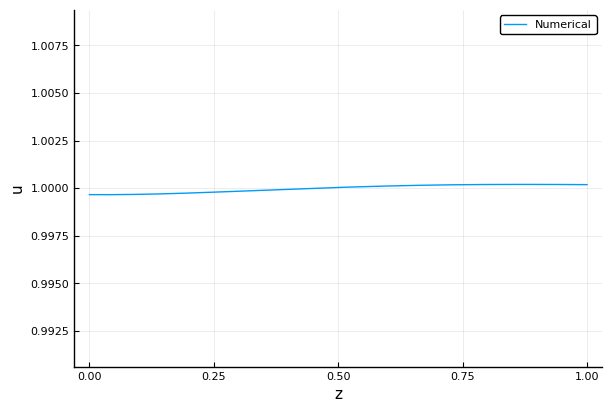

┌ Info: Saved animation to 
│   fn = C:\Users\liyux\github\thermo-network\src\tmp.gif
└ @ Plots C:\Users\liyux\.juliapro\JuliaPro_v1.3.1-2\packages\Plots\B2J6j\src\animation.jl:98


Plots.AnimatedGif("C:\\Users\\liyux\\github\\thermo-network\\src\\tmp.gif")
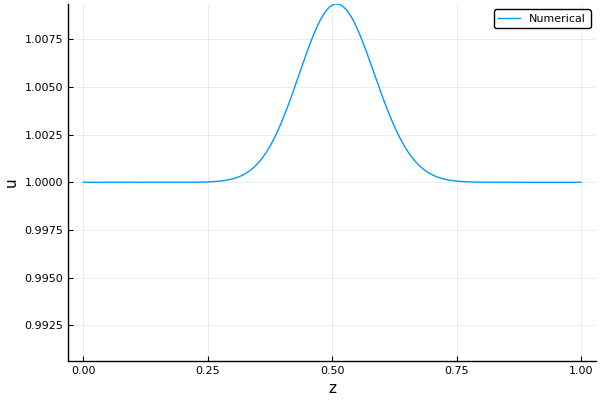

In [7]:
@gif for i in 1:length(uhist)
    plot(ux,uhist[i].p, ylim=(2-maximum(uhist[1].p),maximum(uhist[1].p)), xlabel="z",ylabel="u",label="Numerical");
end